In [1]:
import re
from functools import partial

In [2]:
def f(A, B, alpha, x):
    return (x + B*(log(x)**A))**alpha - x**alpha

In [3]:
g = lambda x: f(2,1,.5,x)

In [4]:
g(20)

sqrt(log(20)^2 + 20) - 4.47213595499958

In [5]:
find_root(g, 1.5, 1000)
# Right, this wasn't supposed to have zeroes.

RuntimeError: f appears to have no zero on the interval

In [6]:
def fprime(A, B, alpha, x):
    num1 = alpha * (1 + A*B*(log(x)**(A-1))/x)
    den1 = (x + B*(log(x)**A))**(1-alpha)
    second = alpha*(x**(alpha - 1))
    return num1/den1 - second

In [7]:
g = lambda x: f(2, 1, .5, x)

In [8]:
N(g(100000000))

0.0169660595602181

verbose 0 (3748: plot.py, generate_plot_points) WARNING: When plotting, failed to evaluate function at 100 points.
verbose 0 (3748: plot.py, generate_plot_points) Last error message: 'unable to convert 4.74433211346233 - 3.23526322523769*I to float; use abs() or real_part() as desired'


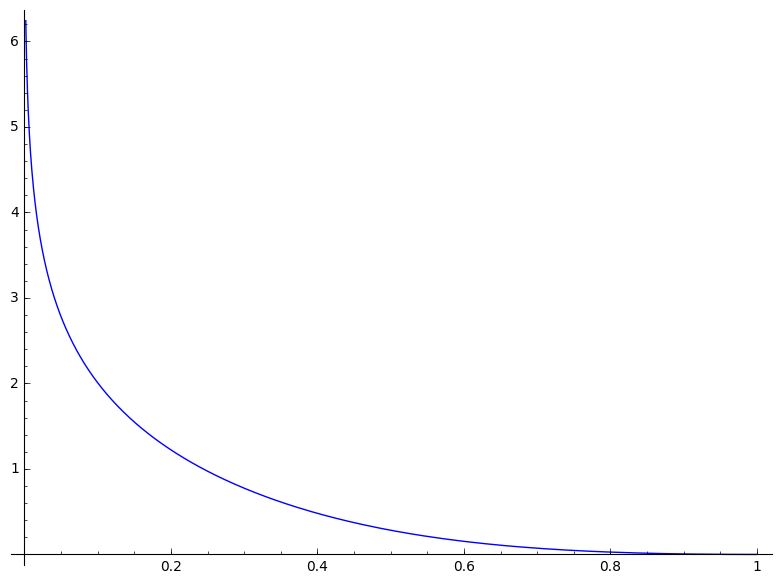

In [9]:
plot(g)

In [10]:
def fprime2(A,B,alpha, x):
    return alpha * (x + B*(log(x))**A)**(alpha - 1) *(1 + B*(log(x)**(A-1))/x) - alpha*x**(alpha - 1)

In [11]:
N(fprime(2,1,.5,10))

0.0285687739515551

In [12]:
N(fprime2(2,1,.5,10))

-0.000862769643119959

In [13]:
g = lambda x: fprime2(2,1,.5,x)

In [14]:
find_root(g, 2, 50)

9.380619771971615

In [15]:
def h(A, B, alpha, x):
    return  (1 + B * log(x)**(A-1)/x) - (1 + B*log(x)**A / x)**(1 - alpha)

In [16]:
h2 = lambda x: h(2,1,.5,x)

In [17]:
N(h2(9.3806))

2.29857681555146e-7

In [18]:
h2 = lambda x: h(2,1,.9, x)

In [19]:
find_root(h2, 2, 10**10)

22473.40226798475

Unfortunately, this breaks for alpha near $1$, as the numbers are simply too large.
I think I will set up a bisection root finder.

In [20]:
h2 = lambda x: h(2,1,.5,x)

In [21]:
find_root(h2, 2, 100)

9.38061977197127

In [22]:
N(exp(2/.5))

54.5981500331442

Wow, the linear estimation is really, really far off. I hadn't expected that at all. This will have large impacts on my heuristics, which I haven't accounted for at all.

In [23]:
f2 = lambda x: f(2,1,.5,x)

In [24]:
N(f2(100))

1.00943197635162

In [25]:
def F(x):
    return (x + log(x)**2)**.5 - x**.5

In [26]:
N(F(10))

0.749486406142164

In [27]:
def Fprime(x):
    return .5*(x + log(x)**2)**(-.5) * (1 + 2*log(x)/x) - .5*x**(-.5)

In [28]:
N(Fprime(69))

0.0000166346913143128

In [29]:
N(F(69))

1.01687643966533

In [30]:
find_root(Fprime, 2, 100)

69.66295006309728

In [31]:
exp(4).n()

54.5981500331442

In [32]:
N(F(10))

0.749486406142164

In [33]:
N(Fprime(10))

0.0285687739515551

## Fully Functioning

In [34]:
def ff(A,B,alpha,x):
    return (x + B*log(x)**A)**alpha - x**alpha

In [35]:
abs(N(ff(2,1,.5,10)) - 0.749486406142164) < 10**-5

True

In [36]:
def ff_prime(A,B,alpha,x):
    return alpha*(x + B*log(x)**A)**(alpha - 1) * (1 + A*B*log(x)**(A-1)/x) - alpha*x**(alpha - 1)

In [37]:
abs(N(ff_prime(2,1,.5,10)) - 0.0285687739515551) < 10**-5

True

In [38]:
ff_prime_fixed = lambda x: ff_prime(2,1,.5,x)

In [39]:
find_root(ff_prime_fixed, 2, 100)

69.66295006309728

In [40]:
ff_prime_fixed(10).n()

0.0285687739515551

In [41]:
partial(ff_prime, 2, 1, .5)(10).n()

0.0285687739515551

In [42]:
find_root(partial(ff_prime,2,1,.9), 2, 10**10)

485168801.80035686

In [43]:
print "{:f}".format(float(exp(20)))

485165195.409790


The predicted guess is actually a very good guess. Good

In [44]:
find_root(partial(ff_prime,2,10,.9), 2, 10**10)

485201194.2555638

Notice that making B much larger barely changes the maximizing prime. Good.

In [45]:
exp(2/.01)

7.22597376812575e86

## Cleaning the Prime Gaps Data

All data comes from http://www.trnicely.net/gaps/gaplist.html

In [23]:
with open("raw_prime_gaps_list.txt", "r") as f:
    lines = f.readlines()

In [24]:
lines[2]

'     4* CFC Glaisher 1877   2.06     1  7\n'

In [48]:
l = lines[2]

In [49]:
l

'     4* CFC Glaisher 1877   2.06     1  7\n'

In [50]:
l.split()

['4*', 'CFC', 'Glaisher', '1877', '2.06', '1', '7']

In [51]:
l.split(None, 6)

['4*', 'CFC', 'Glaisher', '1877', '2.06', '1', '7\n']

`GAP(* IF MAXIMAL) DATA FOUNDER YEAR MERIT DIGITS FIRST_PRIME`

So I want GAP, FIRST_PRIME --> 0, 6

In [52]:
l_list = l.split(None, 6)

In [53]:
gap_str, first_prime_str = l_list[0], l_list[6]

In [54]:
gap_str

'4*'

In [55]:
first_prime_str

'7\n'

In [56]:
if gap_str[-1] == "*":
    print "Maximal"
    gap = gap_str[:-1]
else:
    gap = gap_str
gap = int(gap)
print(gap)

Maximal
4


In [57]:
first_prime = int(first_prime_str.rstrip())
print first_prime
second_prime = first_prime + gap
print second_prime

7
11


Now for most later elements, the first prime is expressed in terms of primorials. Let us now figure out how that is to be done.

In [58]:
l = lines[-10]

In [59]:
l

'  9980  C?C Jacobsen 2017  27.69   157  8351273501*367#/30 - 2592\n'

In [60]:
l_list = l.split(None, 6)

In [61]:
l_list

['9980',
 'C?C',
 'Jacobsen',
 '2017',
 '27.69',
 '157',
 '8351273501*367#/30 - 2592\n']

In [62]:
gap_str, first_prime_str = l_list[0], l_list[6]

In [63]:
if gap_str[-1] == "*":
    print "Maximal"
    gap = gap_str[:-1]
else:
    gap = gap_str
gap = int(gap)
print(gap)

9980


In [64]:
first_prime_str = first_prime_str.rstrip()

In [65]:
first_prime_str

'8351273501*367#/30 - 2592'

In [66]:
primes_to_541 = primes_first_n(100)

def primorial(n):
    return prod([p for p in primes_to_541 if p<= n])

In [67]:
f = first_prime_str

In [68]:
f

'8351273501*367#/30 - 2592'

In [69]:
f.split("*")

['8351273501', '367#/30 - 2592']

In [70]:
pattern = re.compile(r"(\w+)\W*\*\W*(\w+)\W*\#\W*/\W*(\w+)\W*-\W*(\w+)")

In [71]:
m = pattern.match(f)

In [72]:
m.groups()

('8351273501', '367', '30', '2592')

In [73]:
primes_first_n(100)[-1]

541

In [74]:
prod([p for p in primes_first_n(100) if p <= 367])

12164225777291775545094262227518041831435735609411974226225152299039532954922737365042617099319896354948428967312205572919655268168725818308532229330

In [75]:
primorial(367)

12164225777291775545094262227518041831435735609411974226225152299039532954922737365042617099319896354948428967312205572919655268168725818308532229330

All the components for the piece have been created. There are also a few terms of the form `2^n + m`, but they happen to never be maximal. So I ignore them.

For kicks, present a memoized decorator for the final version.

I will also be computing $C(\alpha, \beta)$ very broadly for a set of $\alpha$ and $\beta$, using just a list of primes up to something like $10**8$. This won't be particularly fast, and needs to be set to run overnight.

I believe the ingredients are ready to craft the actual notebook.

In [1]:
def memoize(f):
    memo = {}
    def helper(x):
        if x not in memo:            
            memo[x] = f(x)
        return memo[x]
    return helper
    

In [2]:
def fib(n):
    if n == 0:
        return 0
    if n == 1:
        return 1
    return fib(n-1) + fib(n-2)

In [3]:
fib(5)

5

In [4]:
fib(30)

832040

In [5]:
fib(32)

2178309

In [6]:
@memoize
def fib2(n):
    if n == 0:
        return 0
    if n == 1:
        return 1
    return fib2(n-1) + fib2(n-2)

In [7]:
fib2(5)

5

In [8]:
fib2(30)

832040

In [9]:
fib2(100)

354224848179261915075

In [10]:
t = "2^120 + 42278592958885"

In [12]:
import re

In [18]:
pat = re.compile(r"2\^(\w+)\W*\+\W*(\w+)")

In [19]:
m = pat.match(t)

In [20]:
m

In [21]:
m.groups()

('120', '42278592958885')

In [1]:
sum?